# 02 — Exploratory Data Analysis (EDA)

**Goal:** Explore cleaned loan-repayment data to uncover patterns, anomalies,  
and preliminary signals associated with approval or repayment outcomes.

**Input:** `data/interim/loan_data_clean_start.csv`  
**Output:** Visual summaries, correlation heatmap, and hypothesis draft.

In [1]:
!mkdir -p Loan_Repayment_Behaviour_Analytics/{data/raw,data/interim,data/processed,notebooks,images,reports,src}
!touch Loan_Repayment_Behaviour_Analytics/{README.md,requirements.txt}
!ls -R Loan_Repayment_Behaviour_Analytics

Loan_Repayment_Behaviour_Analytics:
data  images  notebooks  README.md  reports  requirements.txt  src

Loan_Repayment_Behaviour_Analytics/data:
interim  processed  raw

Loan_Repayment_Behaviour_Analytics/data/interim:

Loan_Repayment_Behaviour_Analytics/data/processed:

Loan_Repayment_Behaviour_Analytics/data/raw:

Loan_Repayment_Behaviour_Analytics/images:

Loan_Repayment_Behaviour_Analytics/notebooks:

Loan_Repayment_Behaviour_Analytics/reports:

Loan_Repayment_Behaviour_Analytics/src:


In [3]:
import sys
from pathlib import Path
# Add src folder to Python path (so imports work in notebooks)
ROOT = Path.cwd()
if ROOT.name == "content":
    ROOT = ROOT / "Loan_Repayment_Behaviour_Analytics"

# if running from notebooks folder, go up one level
elif ROOT.name.lower() == "notebooks":
    ROOT = ROOT.parent
ROOT

PosixPath('/content/Loan_Repayment_Behaviour_Analytics')

In [4]:
# ---  Environment Setup ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(str(ROOT / "src"))

from utils_paths import get_project_paths

paths = get_project_paths()

# Unpack for easy use
env = paths["env"]
DATA_RAW = paths["DATA_RAW"]
DATA_INTERIM = paths["DATA_INTERIM"]
DATA_PROCESSED = paths["DATA_PROCESSED"]
IMAGES = paths["IMAGES"]

print(f"Environment: {env}")
print("RAW:", DATA_RAW)
print("INTERIM:", DATA_INTERIM)
print("PROCESSED:", DATA_PROCESSED)

Environment: Colab
RAW: /content/Loan_Repayment_Behaviour_Analytics/data/raw
INTERIM: /content/Loan_Repayment_Behaviour_Analytics/data/interim
PROCESSED: /content/Loan_Repayment_Behaviour_Analytics/data/processed


In [5]:
# --- Load data cleaned in Day 1 ---
clean_path = DATA_INTERIM / "loan_data_clean_start.csv"
df = pd.read_csv(clean_path)

print(f"Loaded {clean_path.name}")
print(f"Rows: {len(df):,} | Columns: {len(df.columns)}")
display(df.head())


Loaded loan_data_clean_start.csv
Rows: 614 | Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()
display(df.describe(include="all").transpose().head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP002990,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [7]:
# --- Convert target column to numeric ---
if "Loan_Status" in df.columns:
    df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

In [8]:
# % of missing values after cleaning
missing = df.isna().sum().sort_values(ascending=False)
if missing.any():
    print(" Still missing values found:")
    display(missing[missing > 0])
else:
    print(" No missing values remain.")

 Still missing values found:


,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3


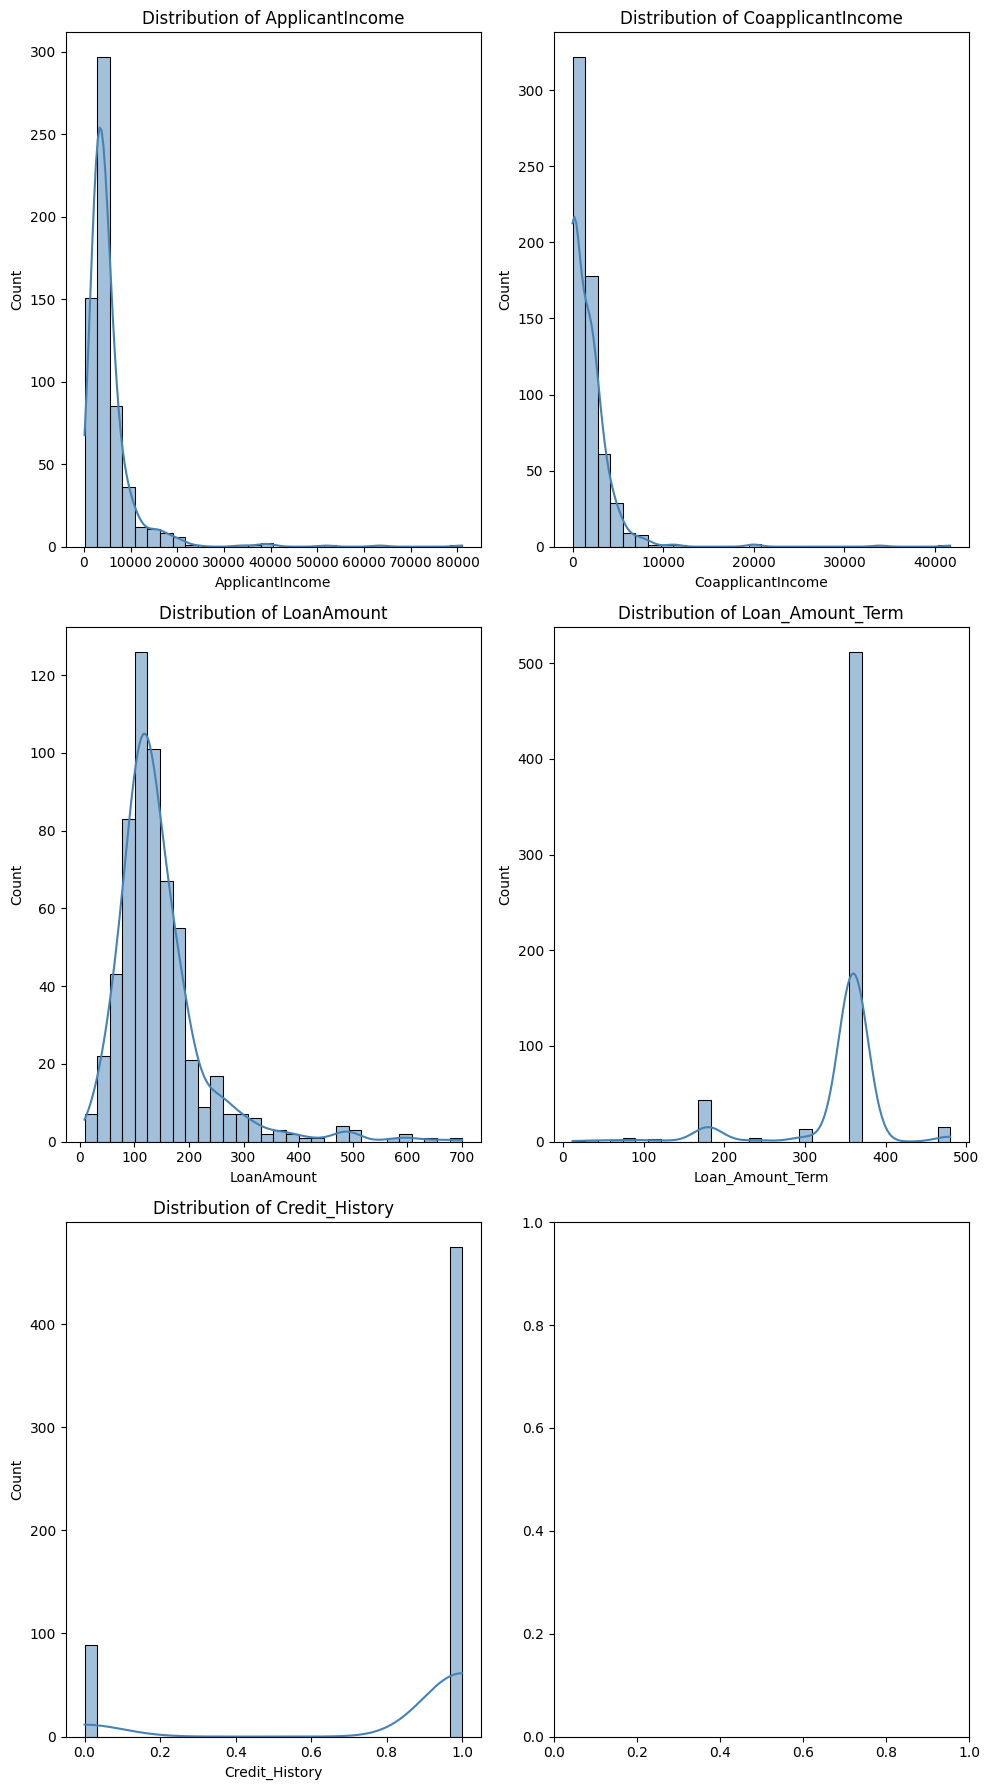

In [9]:
# --- Numeric feature histograms ---
#num_cols = df.select_dtypes(include=["float64","int64"]).columns.drop("Loan_Status")
num_cols = df.select_dtypes(include=["float64","int64"]).columns.tolist()
if "Loan_Status" in num_cols:
    num_cols.remove("Loan_Status")

if len(num_cols) == 0:
    raise ValueError("No numeric columns found for distribution plots!")

fig, axes = plt.subplots(nrows=len(num_cols)//2 + 1, ncols=2, figsize=(10, 18))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="steelblue")
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig(IMAGES / "numeric_distributions.png", dpi=120)
plt.show()


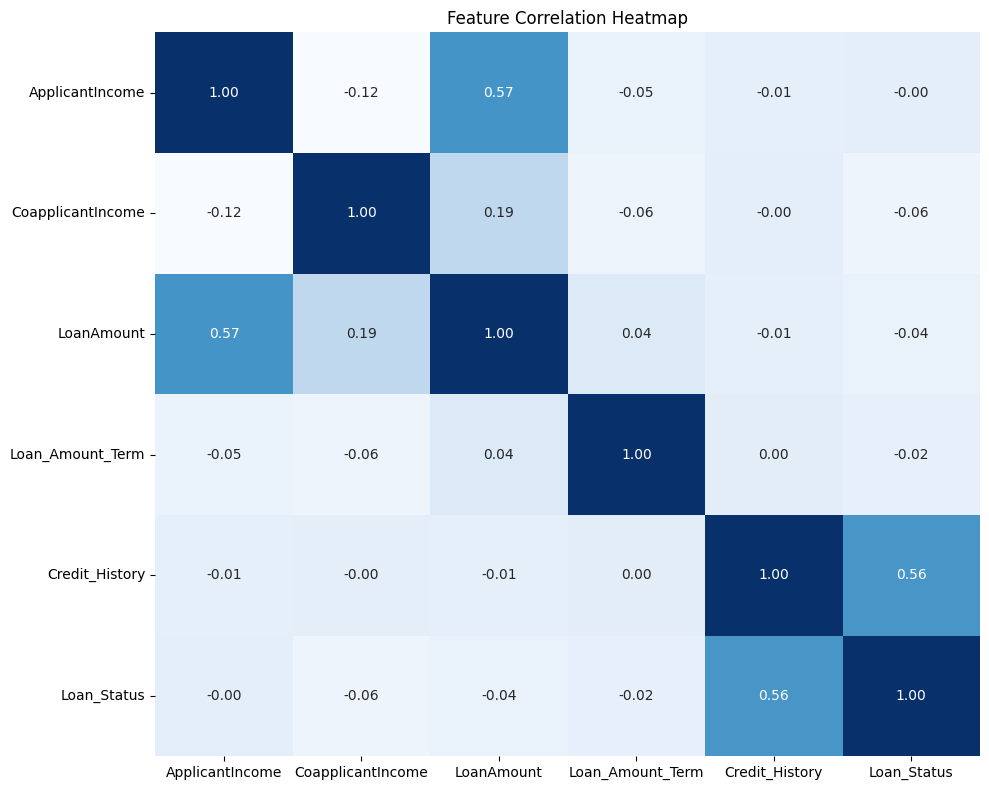

,Loan_Status
Loan_Status,1.000000
Credit_History,0.561678
ApplicantIncome,-0.004710
Loan_Amount_Term,-0.021268
LoanAmount,-0.037318
CoapplicantIncome,-0.059187


In [10]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig(IMAGES / "correlation_heatmap.png", dpi=120)
plt.show()

corr["Loan_Status"].sort_values(ascending=False)


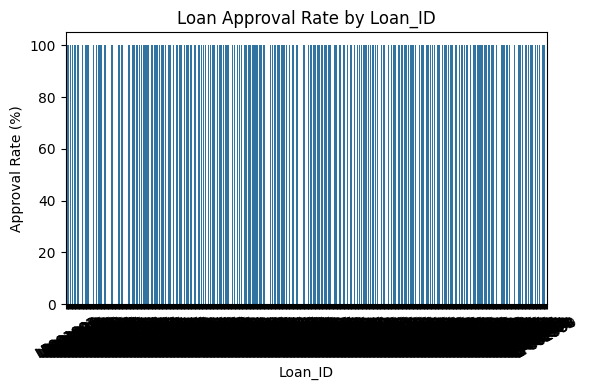

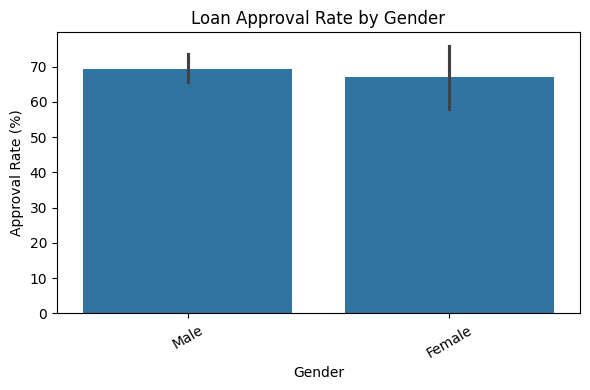

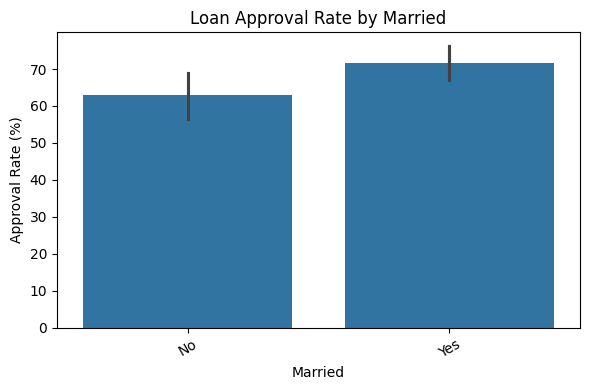

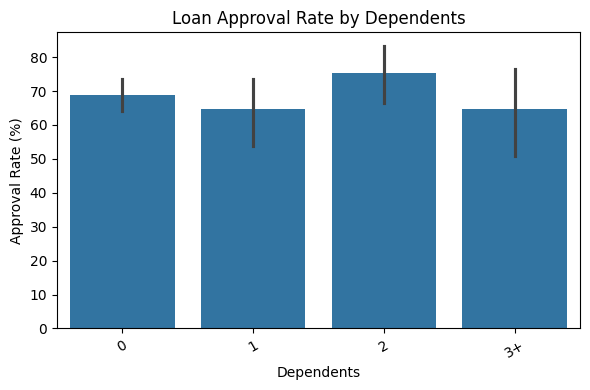

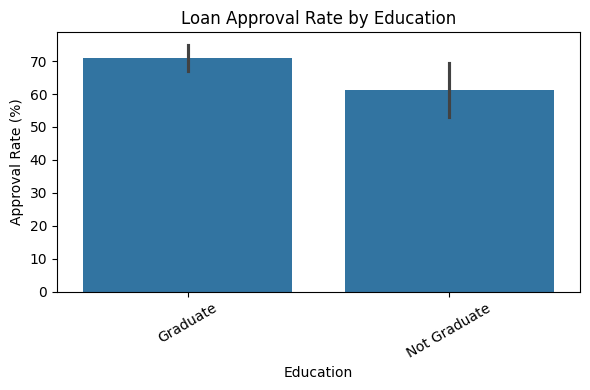

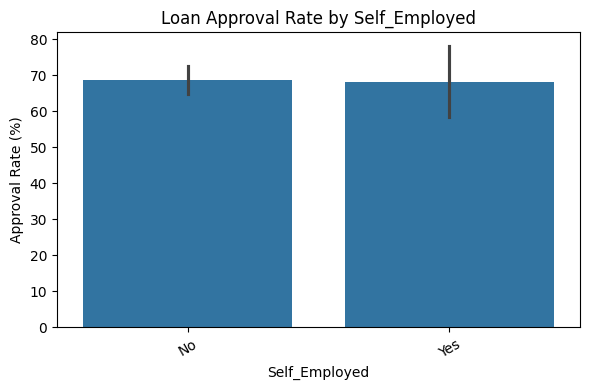

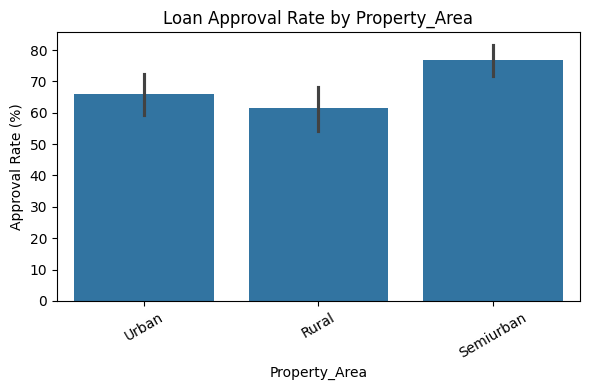

In [11]:
# --- Categorical relationships to target ---
cat_cols = [c for c in df.columns if df[c].dtype == 'object']

for c in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=c, y="Loan_Status", data=df, estimator=lambda x: 100*sum(x)/len(x))
    plt.ylabel("Approval Rate (%)")
    plt.title(f"Loan Approval Rate by {c}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(IMAGES / f"approval_by_{c}.png", dpi=120)
    plt.show()



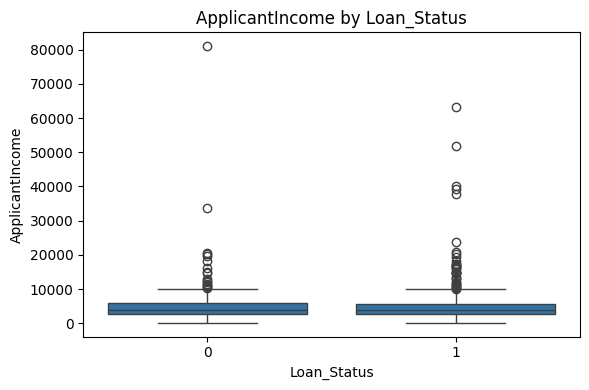

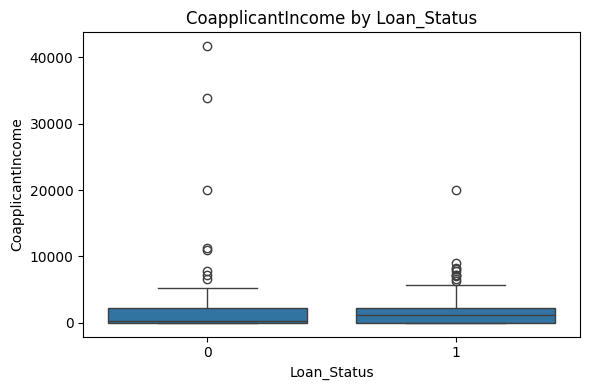

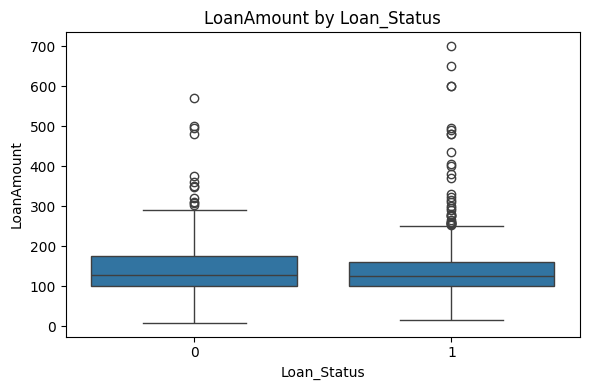

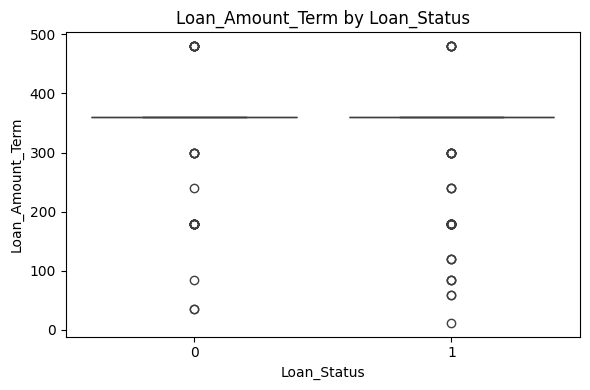

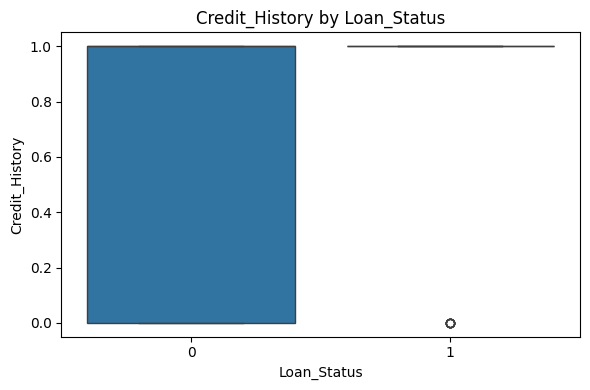

In [17]:
num_cols = [c for c in df.select_dtypes(include=["float64","int64"]).columns if c != "Loan_Status"]

for c in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Loan_Status", y=c, data=df)
    plt.title(f"{c} by Loan_Status")
    plt.tight_layout()
    plt.savefig(IMAGES / f"{c}_by_target.png", dpi=120)
    plt.show()


In [12]:
# --- Generate simple hypotheses based on group means ---

import numpy as np

hypotheses = []

# Numeric signals
for c in num_cols:
    grp = df.groupby("Loan_Status")[c].mean()
    if len(grp) == 2:
        diff = grp[1] - grp[0]
        if abs(diff) > np.std(df[c]) * 0.1:
            trend = "higher" if diff > 0 else "lower"
            hypotheses.append(f"Approved borrowers tend to have {trend} {c.lower()} than non-approved ones.")

# Categorical signals
for c in cat_cols:
    top = df.groupby(c)["Loan_Status"].mean().sort_values(ascending=False)
    best = top.index[0]
    hypotheses.append(f"Borrowers with {c} = '{best}' show higher approval likelihood in this sample.")

print("Auto-generated hypotheses:")
for i, h in enumerate(hypotheses[:6], 1):
    print(f"{i}. {h}")


Auto-generated hypotheses:
1. Approved borrowers tend to have lower coapplicantincome than non-approved ones.
2. Approved borrowers tend to have higher credit_history than non-approved ones.
3. Borrowers with Loan_ID = 'LP002984' show higher approval likelihood in this sample.
4. Borrowers with Gender = 'Male' show higher approval likelihood in this sample.
5. Borrowers with Married = 'Yes' show higher approval likelihood in this sample.
6. Borrowers with Dependents = '2' show higher approval likelihood in this sample.


In [14]:
hypothesis_path = DATA_INTERIM / "eda_hypotheses.txt"
with open(hypothesis_path, "w") as f:
    for h in hypotheses:
        f.write(h + "\n")

print(" Hypotheses saved →", hypothesis_path)


 Hypotheses saved → /content/Loan_Repayment_Behaviour_Analytics/data/interim/eda_hypotheses.txt


### EDA Summary

- Numeric and categorical patterns explored  
- Correlation heatmap exported  
- 3–6 preliminary hypotheses generated  
- All plots saved under `/images/`  

Next → proceed to `03_feature_engineering.ipynb` (Day 3)  
to derive behavioural metrics and prepare for baseline modelling.